In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings("ignore")

np.random.seed(1907)

df = pd.read_csv("interactionData.csv")


            FacA      FacB     FacAB    Result
FacA    1.000000 -0.002828  0.696131  0.703105
FacB   -0.002828  1.000000  0.687298  0.698661
FacAB   0.696131  0.687298  1.000000  0.992209
Result  0.703105  0.698661  0.992209  1.000000
The data size: (999, 4)


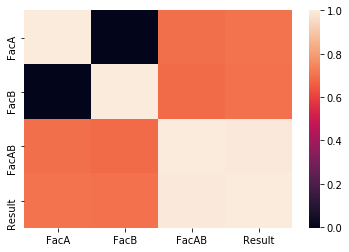

In [2]:
#Generating the correlation matrix
corr = df.corr()

#Generating the correlation heat-map
sns.heatmap(corr)

print(corr)

print("The data size:", df.shape)
df['const']=1


In [3]:
labels = np.array(df['Result'])
df= df.drop('Result', axis = 1)
dfNew = df



In [4]:
train, test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, shuffle=False)
#train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.2, shuffle=False)

#print vif values
[print(variance_inflation_factor(train.values, j)) for j in range(train.shape[1])]

import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y_train, train).fit()
ols_pred = model.predict(test.values) # make the predictions by the model

# Print out the statistics
print(model.summary())

print(metrics.mean_absolute_error(y_test, ols_pred))
print(metrics.mean_squared_error(y_test, ols_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, ols_pred)))


12.87756319353815
12.726664055254886
24.937398073240498
163.9655192783
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.150e+04
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:46:56   Log-Likelihood:                -5839.2
No. Observations:                 749   AIC:                         1.169e+04
Df Residuals:                     745   BIC:                         1.170e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [5]:
df= dfNew.drop('FacAB', axis = 1)

train, test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, shuffle=False)

# Note the difference in argument order
model = sm.OLS(y_train, train).fit()
ols_pred = model.predict(test.values) # make the predictions by the model

# Print out the statistics
print(model.summary())

print(metrics.mean_absolute_error(y_test, ols_pred))
print(metrics.mean_squared_error(y_test, ols_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, ols_pred)))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.494e+04
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:46:56   Log-Likelihood:                -6259.3
No. Observations:                 749   AIC:                         1.252e+04
Df Residuals:                     746   BIC:                         1.254e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FacA         201.9522      1.283    157.423      0.0

In [6]:
df= dfNew.drop('FacA', axis = 1)

train, test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, shuffle=False)

# Note the difference in argument order
model = sm.OLS(y_train, train).fit()
ols_pred = model.predict(test.values) # make the predictions by the model

# Print out the statistics
print(model.summary())

print(metrics.mean_absolute_error(y_test, ols_pred))
print(metrics.mean_squared_error(y_test, ols_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, ols_pred)))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.509e+04
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:46:56   Log-Likelihood:                -6257.1
No. Observations:                 749   AIC:                         1.252e+04
Df Residuals:                     746   BIC:                         1.253e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FacB           7.7671      1.788      4.344      0.0

In [7]:
df= dfNew.drop('FacB', axis = 1)

train, test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, shuffle=False)

# Note the difference in argument order
model = sm.OLS(y_train, train).fit()
ols_pred = model.predict(test.values) # make the predictions by the model

# Print out the statistics
print(model.summary())

print(metrics.mean_absolute_error(y_test, ols_pred))
print(metrics.mean_squared_error(y_test, ols_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, ols_pred)))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.521e+04
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:46:56   Log-Likelihood:                -6255.3
No. Observations:                 749   AIC:                         1.252e+04
Df Residuals:                     746   BIC:                         1.253e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FacA           8.4831      1.786      4.749      0.0

In [8]:
df= dfNew.drop('FacA', axis = 1)
df= df.drop('FacB', axis = 1)

train, test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, shuffle=False)

# Note the difference in argument order
model = sm.OLS(y_train, train).fit()
ols_pred = model.predict(test.values) # make the predictions by the model

# Print out the statistics
print(model.summary())

print(metrics.mean_absolute_error(y_test, ols_pred))
print(metrics.mean_squared_error(y_test, ols_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, ols_pred)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 4.898e+04
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:46:56   Log-Likelihood:                -6266.5
No. Observations:                 749   AIC:                         1.254e+04
Df Residuals:                     747   BIC:                         1.255e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FacAB          1.9545      0.009    221.316      0.0